# **Prediction of Aerodynamic parameters for NACA 2412**


In this project, I created Machine Learning model to Predict Aerodynamic Parameters for airfoil NACA 2412.

So, for that some steps should be followed as given below
.
*   **Data collection**
*   **Training of model**
*   **Testing** 
*   **Validation**  

### **1) Data collection** :
  Collecting data of aerodynamics values with respect to the angle of attack 'alpha' using CFD ( computational fluid dynamics ) is  long-standing task. so, to surpassing that I took graphs for individual Parameters with respect to alpha from airfoil tools website. I took graphs with Reynold's number 50,000 and Ncrit 9. and then I used WebPlotDigitizer to extract Data from graphs. I split that datasets in 70-30 % ratio as per rule of thumb.


### **2) Training of models and testing**

### **Model for Prediction of alpha vs CL**



In [1]:
# installation
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

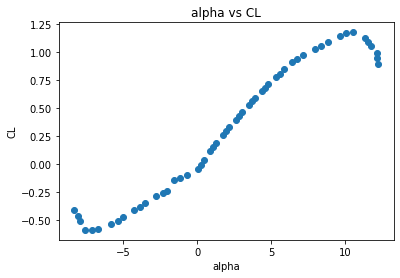

In [2]:
#importing datasets for alpha vs CL
da = pd.read_csv('/content/cl vs alpha csv.csv')
da.head()

#Plotting
a1 = da[['a']]      
CL = da[['CL']]
#a.head()
#CL.head()
plt.scatter(a1,CL)
plt.xlabel('alpha')
plt.ylabel('CL')
plt.title('alpha vs CL')
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression 
Ln = LinearRegression() 
reg = Ln.fit(a1, CL) 
print(reg.predict([[10.95718719]]) )

[[1.1483638]]


### **Model for Prediction of alpha vs CD**

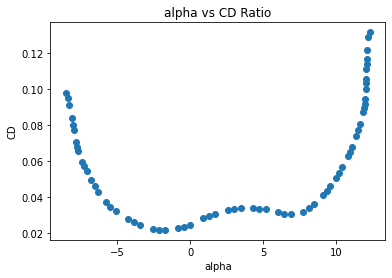

In [4]:
#importing datasets for alpha vs CD
db = pd.read_csv('/content/a vs CD.csv')
db.head()

#Plotting
a2 = db[['a']]
CD = db[['CD']]
#a.head()
#y.head()
plt.scatter(a2,CD)
plt.xlabel('alpha')
plt.ylabel('CD')
plt.title('alpha vs CD Ratio')
plt.show()

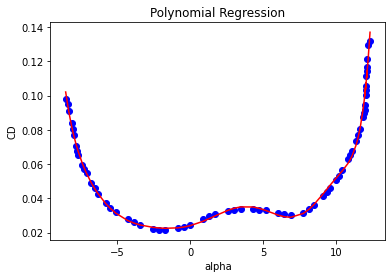

In [5]:
from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 

# Fitting Polynomial Regression 
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree = 10) 
a_poly2 = poly.fit_transform(a2) 

poly.fit(a_poly2, CD) 
poly_reg = LinearRegression() 
poly_reg.fit(a_poly2, CD) 


# Visualization
plt.scatter(a2, CD, color = 'blue') 
plt.plot(a2, poly_reg.predict(poly.fit_transform(a2)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('alpha') 
plt.ylabel('CD') 
plt.show() 

In [6]:
print(poly_reg.predict(poly.fit_transform([[-8.186902587]])) )

[[0.08533525]]


### **Model for Prediction of alpha vs CL/CD Ratio**

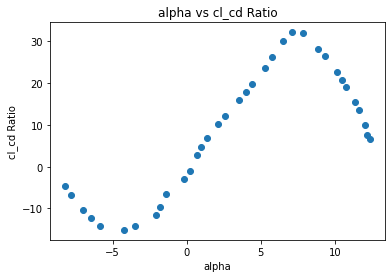

In [7]:
#importing Data for alpha vs CL/CD ratio
dc = pd.read_csv('/content/Default Dataset_New.csv')
dc.head()

#Plotting

a3 = dc[['alpha']]
cl_cd = dc[['cl_cd']]
#a.head()
#cl_cd.head()
plt.scatter(a3,cl_cd)
plt.xlabel('alpha')
plt.ylabel('cl_cd Ratio')
plt.title('alpha vs cl_cd Ratio')
plt.show()

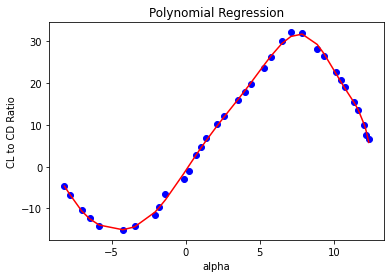

In [8]:
from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 

# Fitting Polynomial Regression  
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree = 10)
a_poly3 = poly.fit_transform(a3) 

poly.fit(a_poly3, cl_cd) 
poly_reg = LinearRegression() 
poly_reg.fit(a_poly3, cl_cd) 

#Visualization

plt.scatter(a3, cl_cd, color = 'blue') 
plt.plot(a3, poly_reg.predict(poly.fit_transform(a3)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('alpha') 
plt.ylabel('CL to CD Ratio') 
plt.show() 

In [9]:
print(poly_reg.predict(poly.fit_transform([[8.441723633]])) )

[[30.80818611]]


### **3) Validation :**

I done Validation Between Results from Trained model and test data.